In [1]:

from helpers.data import X
# from torchShiftAAregInit import torchShiftAAregInit
import torch
from torchShiftAADiscTau import torchShiftAADisc
from torchAA import torchAA
import matplotlib.pyplot as plt
import numpy as np


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


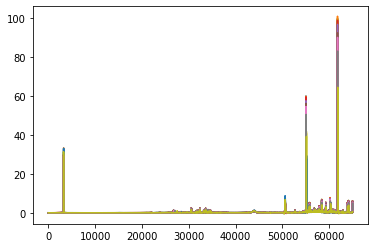

In [2]:
lim = (76700,77000)
# X = X.T[15000:80000]
# X=X.T
plt.rcParams["figure.figsize"] = (27,3)
plt.plot(X.T)

# X = X.T[68000:80500]

plt.show()

In [4]:
X.shape

(29, 65000)

In [5]:
rank = 3

In [6]:
reg_AA = torchAA(X, rank, lr=0.3)
C_reg, S_reg = reg_AA.fit(verbose=True)

In [30]:
AA = torchShiftAADisc(X, rank, lr=0.3)

AA.C_tilde = reg_AA.C
AA.S_tilde = reg_AA.S

C, S, tau, = AA.fit(verbose=True, max_iter=10)


epoch: 1, Loss: 0.8723033107911609
 Tau: 9.327379053088816
epoch: 2, Loss: 0.890733884428919
 Tau: 17.435595774162696
epoch: 3, Loss: 0.8996404288969851
 Tau: 24.63736998950984
epoch: 4, Loss: 0.906492170977335
 Tau: 31.368774282716245
epoch: 5, Loss: 0.9080580254086975
 Tau: 37.82856063875548
epoch: 6, Loss: 0.9103867910753984
 Tau: 44.81071300481616
epoch: 7, Loss: 0.9142163527855196
 Tau: 50.02999100539596
epoch: 8, Loss: 0.9156974566028402
 Tau: 56.49778756730214
epoch: 9, Loss: 0.917482206881431
 Tau: 60.91797764207213
epoch: 10, Loss: 0.9207481579279099
 Tau: 67.55738301621814


In [31]:
recon = AA.recon.detach().resolve_conj().numpy()
A = torch.fft.ifft(AA.A_F).detach().numpy()

CX = A
SCX = recon

recon_no_shift = np.matmul(S,A)


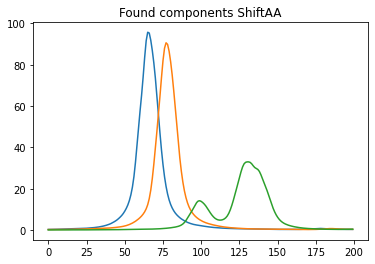

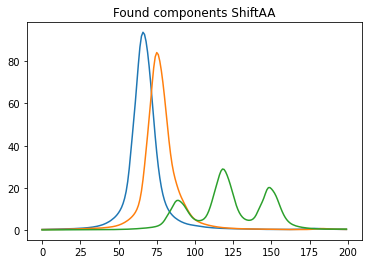

In [32]:

# for signal in CX:
#     plt.plot(signal)
plt.plot(CX.T[61700:61900])
plt.title("Found components ShiftAA")
plt.show()
plt.plot(np.matmul(C_reg, X).T[61700:61900])
plt.title("Found components RegularAA")
plt.show()

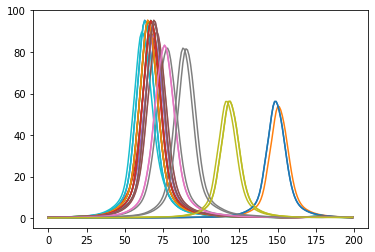

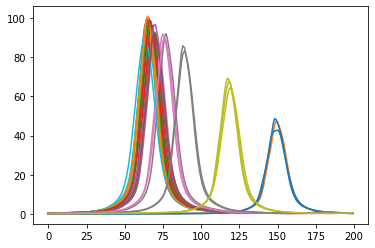

In [22]:


# lim = (0,125000)

plt.plot(recon.T[61700:61900])
#change figure size
plt.show()

plt.plot(X.T[61700:61900])
plt.show()